<img src="documentation/2020_WS_Practical/commonocean_logo.png">

# commonocean-io

The following notebook will guide you through aspects and features of commonocean-io, so that you can easily use the package afterwards.
Most of the modules and classes are identical to CommonRoad. So the CommonRoad documentation should clarify questions.
The new ones are listed in *commonocean/README* and the source code is provided with explanatory comments.

First we import some packages and read in a scenario and a set of planning problems and plot both.

/Users/brunomaione/Documents/TUM/HiWi/CommonOcean Website/Code/coIO/commonocean_io/commonocean/scenario/scenario.py:310: UserWarning: Not a valid scenario id: CommonOceanTutorial
  warnings.warn('Not a valid scenario id: ' + benchmark_id)


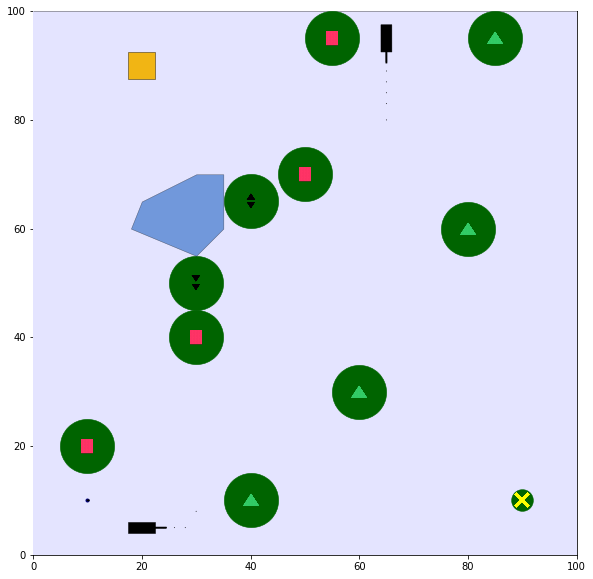

In [2]:
import matplotlib.pyplot as plt

from commonocean.common.file_reader import CommonOceanFileReader
from commonocean.visualization.draw_dispatch_cr import draw_object

# generate path of the file to be read
path_file = "./scenarios/CommonOcean_Test_Scenario-1.xml"

# read in the scenario and planning problem set
scenario, planning_problem_set = CommonOceanFileReader(path_file).open()

# plot scenario and planning_problem_set
plt.figure(figsize=(10, 10))
draw_object(scenario)
draw_object(planning_problem_set)
plt.gca().set_aspect('equal')
plt.margins(0, 0)
plt.show()

We should see how two ships move through the fairway as dynamic objects in the standard scenario. We also see several buoys, which automatically generate a static obstacle around themselves, so that the search algorithm later finds a path that does not collide with the traffic signs.

# drivability-checker

The collision checker library provides a convenient interface to commonroad-io. 

We have extended the library so that also static and dynamic obstacles of commonocean can be used for the calculation.

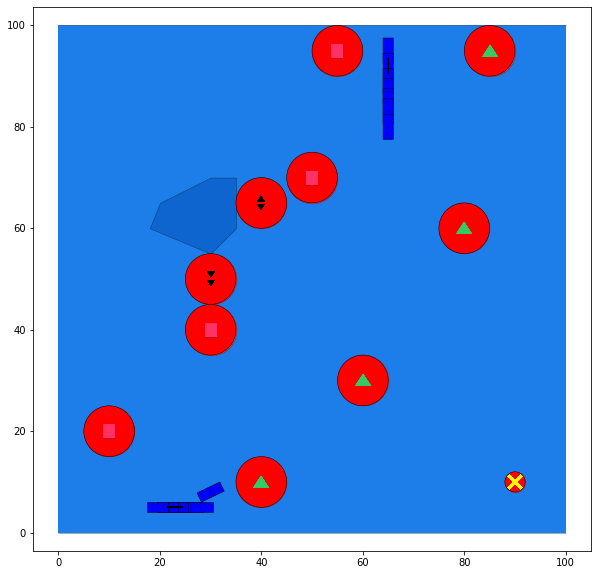

In [10]:
from commonroad_dc.collision.visualization.draw_dispatch import draw_object as draw_object_collision
from commonroad_dc.collision.collision_detection.pycrcc_collision_dispatch import create_collision_object

plt.figure(figsize=(10, 10))
draw_object(scenario)

# convert each static obstacle in the scenario to a collision object and plot it
for obs in scenario.static_obstacles:
    draw_object_collision(create_collision_object(obs),draw_params={'collision': {'facecolor': 'red'}})

# convert each dynamic obstacle in the scenario to a collision object and plot it
for obs in scenario.dynamic_obstacles:
    draw_object_collision(create_collision_object(obs),draw_params={'collision': {'facecolor': 'blue'}})

plt.autoscale()
plt.axis('equal')
plt.show()


